In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Loading the data from csv file 
uberride = pd.read_csv('/Users/sachinkharche/uberrides_analysis/Data/uber-raw-data-apr14.csv',encoding='utf-8')

In [2]:
uberride.head(4)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512


In [3]:
uberride.shape

(564516, 4)

In [4]:
uberride.duplicated().sum()

7749

In [5]:
uberride.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [6]:
uberride.drop_duplicates(inplace=True)

In [7]:
uberride['Date/Time']=pd.to_datetime(uberride['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [8]:
uberride['Date/Time'].dtype

dtype('<M8[ns]')

In [9]:
uberride['Month']=uberride['Date/Time'].dt.month

<AxesSubplot:>

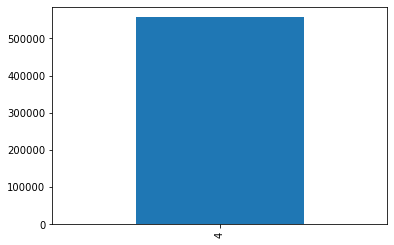

In [10]:
uberride['Month'].value_counts().plot(kind='bar')

In [11]:
uberride['weekday']=uberride['Date/Time'].dt.day_name()
uberride['Day']=uberride['Date/Time'].dt.day
uberride['Hour']=uberride['Date/Time'].dt.hour
uberride['Month']=uberride['Date/Time'].dt.month
uberride['Minute']=uberride['Date/Time'].dt.minute

In [12]:
uberride.head(4)

,Date/Time,Lat,Lon,Base,Month,weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,Tuesday,1,0,28


In [13]:
temp=uberride.groupby(['Month','weekday']).size()
temp.head(6)

Month  weekday 
4      Friday      88985
       Monday      60075
       Saturday    76152
       Sunday      50524
       Thursday    83954
       Tuesday     89957
dtype: int64

In [14]:
temp=uberride.groupby(['Month','weekday'],as_index=False).size()
temp.head(6)

,Month,weekday,size
0,4,Friday,88985
1,4,Monday,60075
2,4,Saturday,76152
3,4,Sunday,50524
4,4,Thursday,83954
5,4,Tuesday,89957


In [15]:
temp['Month'].unique()

array([4])

In [16]:
temp['weekday'].unique()
temp['weekday']

0       Friday
1       Monday
2     Saturday
3       Sunday
4     Thursday
5      Tuesday
6    Wednesday
Name: weekday, dtype: object

In [17]:
dict_wk={1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
dict_wk

{1: 'Sunday',
 2: 'Monday',
 3: 'Tuesday',
 4: 'Wednesday',
 5: 'Thursday',
 6: 'Friday',
 7: 'Saturday'}

In [18]:
temp['weekday']

0       Friday
1       Monday
2     Saturday
3       Sunday
4     Thursday
5      Tuesday
6    Wednesday
Name: weekday, dtype: object

In [19]:
temp

,Month,weekday,size
0,4,Friday,88985
1,4,Monday,60075
2,4,Saturday,76152
3,4,Sunday,50524
4,4,Thursday,83954
5,4,Tuesday,89957
6,4,Wednesday,107120


<AxesSubplot:xlabel='Month', ylabel='size'>

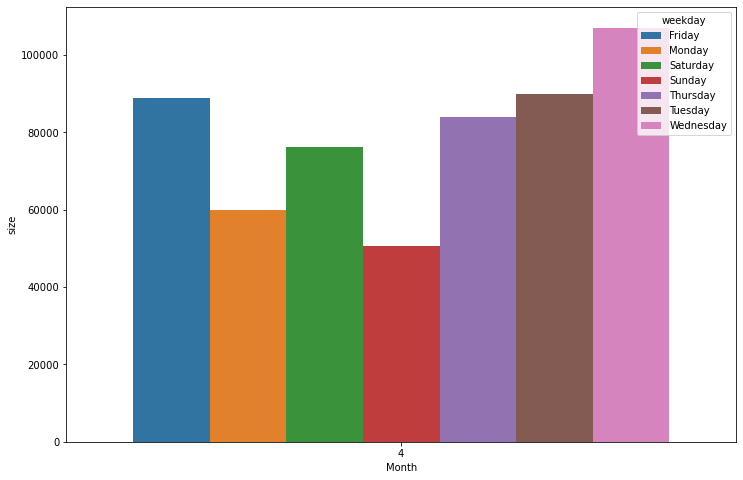

In [41]:
#To zoom in the chart
plt.figure(figsize=(12,8))
#plot the bar chart
sns.barplot(x='Month',y='size',hue='weekday',data=temp)

In [23]:
uberride.groupby(['Month','weekday','Hour']).count()

Date/Time   Lat   Lon  Base   Day  Minute
Month weekday   Hour                                           
4     Friday    0          1349  1349  1349  1349  1349    1349
                1           745   745   745   745   745     745
                2           504   504   504   504   504     504
                3           721   721   721   721   721     721
                4           907   907   907   907   907     907
...                         ...   ...   ...   ...   ...     ...
      Wednesday 19         7683  7683  7683  7683  7683    7683
                20         7671  7671  7671  7671  7671    7671
                21         6838  6838  6838  6838  6838    6838
                22         4771  4771  4771  4771  4771    4771
                23         2536  2536  2536  2536  2536    2536

[168 rows x 6 columns]

In [27]:
uberride.groupby(['Month','weekday','Hour']).size()

Month  weekday    Hour
4      Friday     0       1349
                  1        745
                  2        504
                  3        721
                  4        907
                          ... 
       Wednesday  19      7683
                  20      7671
                  21      6838
                  22      4771
                  23      2536
Length: 168, dtype: int64

In [77]:
hourdata=uberride.groupby(['Hour'],as_index=False).size()

In [78]:
hourdata

,Hour,size
0,0,11716
1,1,7620
2,2,4849
3,3,4938
4,4,5965
5,5,9302
6,6,18224
7,7,24624
8,8,22577
9,9,17758


<AxesSubplot:xlabel='Hour', ylabel='size'>

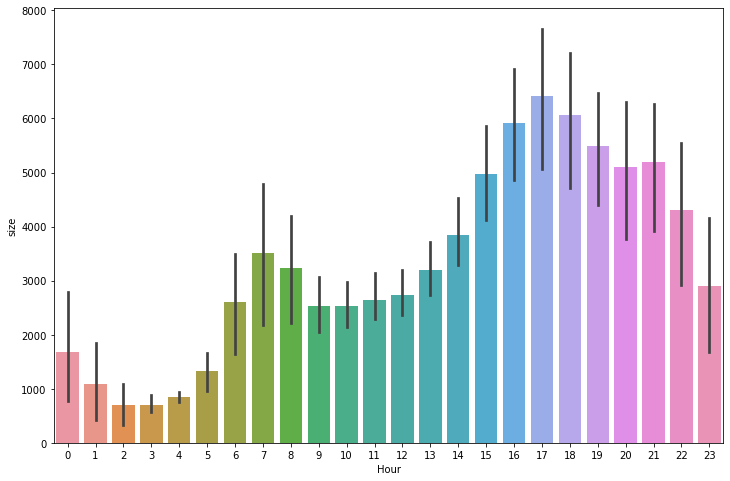

In [61]:
#To zoom in the chart
plt.figure(figsize=(12,8))
#plot the bar chart
sns.barplot(x='Hour',y='size',data=hourdata)

In [75]:
daydata=uberride.groupby(['weekday','Hour'],as_index=False).size()

In [76]:
daydata

,weekday,Hour,size
0,Friday,0,1349
1,Friday,1,745
2,Friday,2,504
3,Friday,3,721
4,Friday,4,907
...,...,...,...
163,Wednesday,19,7683
164,Wednesday,20,7671
165,Wednesday,21,6838
166,Wednesday,22,4771


<AxesSubplot:xlabel='Hour', ylabel='size'>

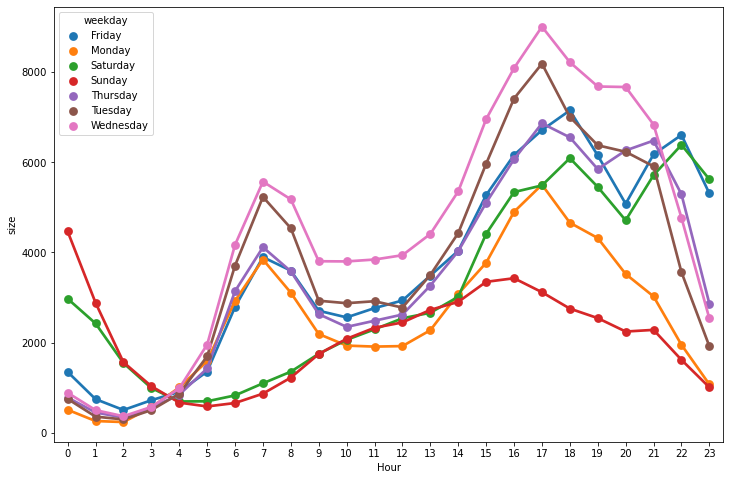

In [87]:
plt.figure(figsize=(12,8))
sns.pointplot(x='Hour',y='size',hue='weekday',data=daydata)

<AxesSubplot:xlabel='Hour', ylabel='size'>

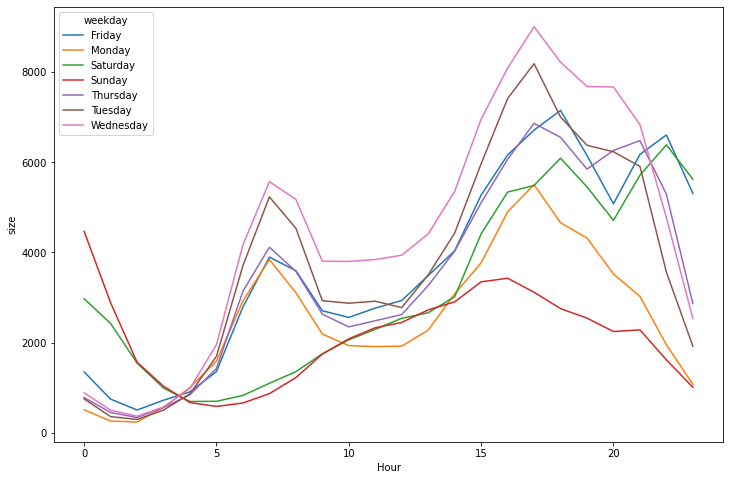

In [88]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='size',hue='weekday',data=daydata)